In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [4]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [5]:
print(df.groupby(['gender', 'test preparation course']).size())

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
dtype: int64


# 2. What do you think about the students' parental level of education?

In [6]:
print(df.groupby(['parental level of education']).size())# Here most of the parents have college level education and only few
# as master's degree

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64


# 3. Who scores the most on average for math, reading and writing based on
#● Gender
#● Test preparation course

In [66]:
print(df.groupby('gender').mean().round(3))

        math score  reading score  writing score
gender                                          
female      63.376         72.591         72.467
male        68.822         65.546         63.446


In [67]:
print(df.groupby(['gender','test preparation course']).mean().round(3))

                                math score  reading score  writing score
gender test preparation course                                          
female completed                    67.109         77.375         78.793
       none                         61.320         69.955         68.982
male   completed                    72.989         70.793         70.339
       none                         66.468         62.581         59.552


# 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [68]:
print(df.groupby(['gender','test preparation course']).var().round(3))

                                math score  reading score  writing score
gender test preparation course                                          
female completed                   208.174        161.176        149.837
       none                        272.603        214.241        225.495
male   completed                   197.098        185.298        166.098
       none                        205.514        184.844        181.395


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [7]:
df[['math score']].describe()

,math score
count,1000.000000
mean,66.001000
std,15.569567
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000


<AxesSubplot:ylabel='Frequency'>

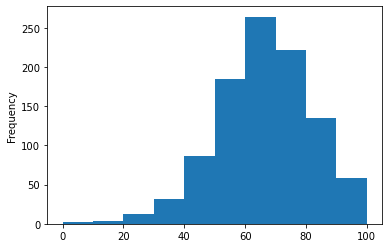

In [5]:
df['math score'].plot(kind='hist')

In [10]:
df[['math score']].quantile()

math score    66.0
Name: 0.5, dtype: float64

In [15]:
df_stats =df.groupby(
    ["gender"])[["math score"]].describe()

In [16]:
df_stats

math score                                                     
            count       mean        std   min   25%   50%   75%    max
gender                                                                
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0